# Lý thuyết 

1. Để khởi tạo model trong pytorch chúng ta sử dụng class nào?
 
  A. nn.Module

2. Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?

  D. Kế thừa lại class nn.Module. Khởi tạo các layers trong hàm tạo __init__() và sử dụng các layers để tính toán dữ liệu trong hàm forward().

3. Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.

  B. torch.nn: Dùng để khởi tạo các layers và activations function và loss function, torch.optim: Khởi tạo optimizer, torch.utils.data: Khởi tạo dataset và dataloader

4. Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?

  B. Khởi tạo một class kế thừa lại torch.utils.data.Dataset. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm __getitem__() để thực hiện các xử lý trên dữ liệu

5. Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?

     C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

# Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

In [ ]:
import torch

A = torch.randn([32, 32, 3])

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

In [ ]:
R = A[:,:,0]
G = A[:,:,1]
B = A[:,:,2]

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

In [ ]:
result_hadamard = R*G
result_normal = R@G

In [ ]:
result_hadamard

tensor([[-0.4287, -0.0635,  0.5941,  ...,  0.1021,  0.6925, -0.0462],
        [-0.1671,  0.4009, -0.1885,  ...,  0.2403, -2.5749,  2.6918],
        [-0.4400, -0.3964,  0.0608,  ..., -1.3492,  0.0219,  0.0627],
        ...,
        [ 0.9453,  0.3339, -0.1231,  ...,  3.7963,  4.1594,  0.9520],
        [ 0.1076,  0.2886, -0.1423,  ...,  0.4550, -0.1090, -0.2966],
        [ 2.0144, -0.1713, -0.0280,  ...,  0.1208, -1.5900, -0.9243]])

In [ ]:
result_normal

tensor([[ 7.4802,  0.5341,  5.7079,  ..., -5.0701,  0.9830,  7.9292],
        [-0.9853,  2.9422,  0.5887,  ..., 11.5475,  8.4835,  3.6583],
        [ 1.0256, -1.5988,  5.6691,  ...,  2.2398,  0.9005,  3.8246],
        ...,
        [ 2.4497,  0.0919, -2.9607,  ...,  6.4261,  5.7593,  3.5547],
        [-4.4682,  1.9392, -0.6868,  ...,  1.8579,  8.2707,  0.5727],
        [-3.1464, -4.6927,  1.2384,  ..., -4.6144,  2.9537,  5.0531]])

##### 9) Từ bộ dữ liệu Income-Classification hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = "/content/drive/My Drive/machine_learning_hand_On_DS/kaggle/income"
# OS.chdir(path)
%cd {path}

Mounted at /content/drive
/content/drive/My Drive/machine_learning_hand_On_DS/kaggle/income


In [ ]:
import numpy as np
import random
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [ ]:
df_all = pd.read_csv('train.csv')

In [ ]:
# normalize string
def str_normalize(s):
    # convert into lowercase and replace multiple spaces into single space
    s = str(s).strip().lower()
    s = re.sub(' +', " ", s)
    return s
# Encode category and object columns 
def process(df):        
  for col in df.columns:
      if df[col].dtype.name == "object" or df[col].dtype.name == "category":
          df[col] = df[col].apply(str_normalize).astype("category")
  return df
df_all = process(df_all.copy())
IDs=df_all.pop('ID')
label = df_all.pop('target_income')
df_all_one_hot = pd.get_dummies(df_all)

In [ ]:
features = df_all_one_hot.columns.tolist()
label = label.values

In [ ]:
features = df_all_one_hot.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot[features].values, # input variable
                                                    label, # output variable
                                                    test_size=0.2, # test dataset proportion
                                                    # stratify=df_all['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



##### 10. Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=100,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')



Ready to load data


In [ ]:
hl = 50
# Define the neural network
class IncomeNet(nn.Module):
    def __init__(self):
        super(IncomeNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = IncomeNet()
print(model)

IncomeNet(
  (fc1): Linear(in_features=108, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 0.437949
Validation set: Average loss: 0.324706, Accuracy: 4214/5000 (84%)

Epoch: 2
Training set: Average loss: 0.322784
Validation set: Average loss: 0.312720, Accuracy: 4248/5000 (85%)

Epoch: 3
Training set: Average loss: 0.311135
Validation set: Average loss: 0.311693, Accuracy: 4263/5000 (85%)

Epoch: 4
Training set: Average loss: 0.304944
Validation set: Average loss: 0.309665, Accuracy: 4259/5000 (85%)

Epoch: 5
Training set: Average loss: 0.300706
Validation set: Average loss: 0.310719, Accuracy: 4254/5000 (85%)

Epoch: 6
Training set: Average loss: 0.296940
Validation set: Average loss: 0.309115, Accuracy: 4252/5000 (85%)

Epoch: 7
Training set: Average loss: 0.293479
Validation set: Average loss: 0.311996, Accuracy: 4268/5000 (85%)

Epoch: 8
Training set: Average loss: 0.291079
Validation set: Average loss: 0.314873, Accuracy: 4269/5000 (85%)

Epoch: 9
Training set: Average loss: 0.287230
Validation set: Average loss: 0.316832, Accuracy: 

=> mô hình có dấu hiệu overfitting

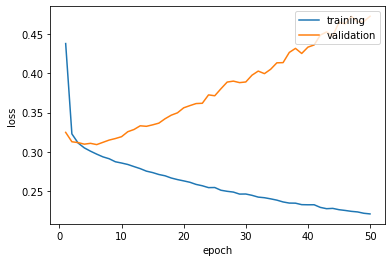

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

In [ ]:
get_metrics(y_test, predicted)

ACCURACY_SCORE:  0.8406
F1_SCORE:  0.7619
CONFUSION_MATRIX:
 [[3539  272]
 [ 525  664]] 

              precision    recall  f1-score   support

           0     0.8708    0.9286    0.8988      3811
           1     0.7094    0.5585    0.6249      1189

    accuracy                         0.8406      5000
   macro avg     0.7901    0.7435    0.7619      5000
weighted avg     0.8324    0.8406    0.8337      5000
 

